# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [45]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [46]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

(500, 2)
(500,)


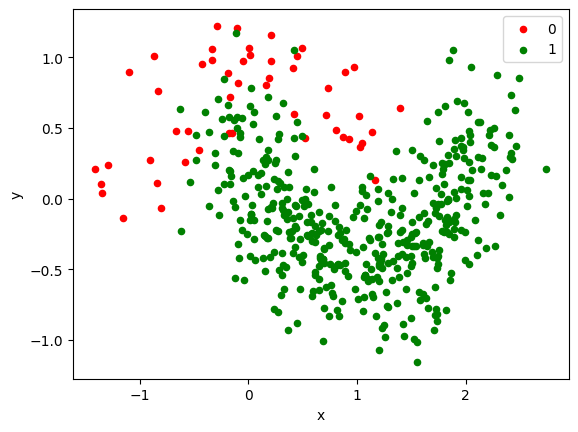

In [47]:
# vsualizing original data
print(X.shape)
print(Y.shape)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
color = {0:"red", 1:"green"}
fig, ax = plt.subplots()
class_group = df.groupby("label")
for classification, group in class_group:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=classification, color=color[classification])
plt.show()

General idea: try to specify a "boundary" where separates type 0 and 1.
Reading on "https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501", I figured the most suitable models to use are Logical regression("widely used when classification problem is binary"), and SVM("finds the best way to classify the daya based on the position in relation to a border between positive class and negative class").
I decide to use the SVM model since it's a closer description of our problem, where we differentiate between two classes, 0 and 1, based on their position in the x, y coordinate. Even though in the graph I outputed the border isn't clear, we need to consider that we have a noise level is 0.25, so we would expect there exists a boundary line that divides the two category.
Now, let's move on to the training part.

## Training

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

## Testing / Optimization

In [49]:
# test using the test set
y_pred = model.predict(X_test)
model.score(X_test, y_pred)

1.0

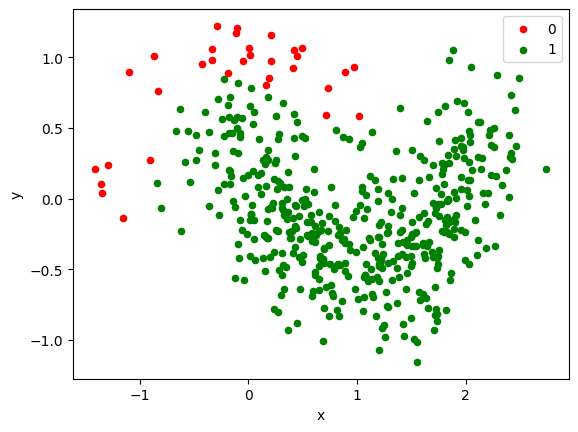

In [50]:
# Could also plot out
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=model.predict(X)))
color = {0:"red", 1:"green"}
fig, ax = plt.subplots()
class_group = df.groupby("label")
for classification, group in class_group:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=classification, color=color[classification])
plt.show()

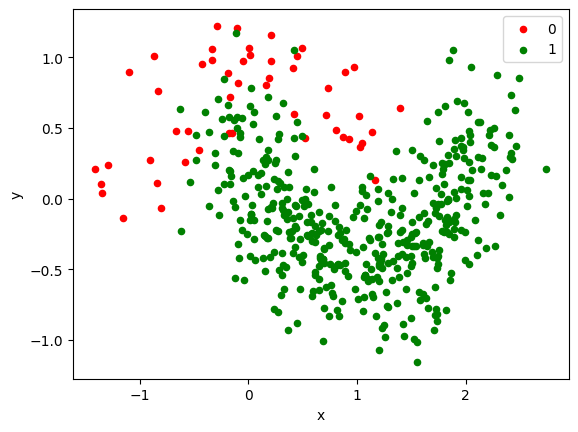

In [51]:
# Comparing with original plot
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
color = {0:"red", 1:"green"}
fig, ax = plt.subplots()
class_group = df.groupby("label")
for classification, group in class_group:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=classification, color=color[classification])
plt.show()

In [52]:
# Percentage of wrong prediction throughout the test set
new_d = {'x': X_test[:,0], 'y' : X_test[:,1], "original_class": y_test}
new_df = pd.DataFrame(data=new_d)
new_df["predicted_class"] = model.predict(X_test)
df_wrong = new_df[new_df["original_class"] != new_df["predicted_class"]]
num_wrong = len(df_wrong)
percentage_of_wrong_prediction = num_wrong / len(new_df)
print("The percentage of wrong prediction through out the test set is " + str(percentage_of_wrong_prediction))

The percentage of wrong prediction through out the test set is 0.05


In [53]:
# Percentage of wrong prediction throughout the entire data set
new_d = {'x': X[:,0], 'y' : X[:,1], "original_class": Y}
new_df = pd.DataFrame(data=new_d)
new_df["predicted_class"] = model.predict(X)
df_wrong = new_df[new_df["original_class"] != new_df["predicted_class"]]
num_wrong = len(df_wrong)
percentage_of_wrong_prediction = num_wrong / len(new_df)
print("The percentage of wrong prediction through out the entire dataset is " + str(percentage_of_wrong_prediction))

The percentage of wrong prediction through out the entire dataset is 0.044


## Performance Analysis

    Firstly, we have a model score of 1.0 on the test set, which means the result is reliable.
    Secondly, comparing the two graphs, the wrong predictions mostly takes place in a point that's surronded by points of another color, so it could be attributed to noise.
    Thirdly, the percentage of wrong predictions in the test set is 5%, which is low.
    These metrics demonstrate that the SVC model performs well on the random moon dataset.